In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import datetime

In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Work/metric_timeseries_values_202405061252.csv')

In [4]:
df.head(5)

,resource,type,resource_attributes,ts,values
0,4.893203e+15,process,"[, param-workhorse, linux, 738170, 2, root, pa...",1713957330000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,8.719503e+15,process,"[/opt/google/chrome/chrome, param, param-workh...",1713957330000,"[0.10999999999999999, 0.0, 0.3226330876350403,..."
2,4.754841e+16,process,[/opt/google/chrome/chrome --type=renderer --c...,1713956680000,"[0.01, 0.0, 0.26268723607063293, 8.7519232E7, ..."
3,4.754841e+16,process,[/opt/google/chrome/chrome --type=renderer --c...,1713956685000,"[0.01, 0.0, 0.26268723607063293, 8.7519232E7, ..."
4,4.754841e+16,process,"[731846, 6460, chrome, /opt/google/chrome/chro...",1713956690000,"[0.01, 0.0, 0.2630806267261505, 8.7650304E7, 1..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3491275 entries, 0 to 3491274
Data columns (total 5 columns):
 #   Column               Dtype  
---  ------               -----  
 0   resource             float64
 1   type                 object 
 2   resource_attributes  object 
 3   ts                   int64  
 4   values               object 
dtypes: float64(1), int64(1), object(3)
memory usage: 133.2+ MB


In [6]:
df['resource'].nunique()

6471

Here we are grouping by the `resource` column so that we get dataframes mapped by the resource ID.

In [7]:
resources=df.groupby('resource')

In [9]:
# To check the distribution of data throughout the unique resources
top_resource= resources.count().sort_values(by=['type'], ascending=False)

In [10]:
top_resource.head(25)

,type,resource_attributes,ts,values
resource,,,,
3.241937e+17,38286,38286,38286,38286
1.240976e+18,31699,31699,31699,31699
1.250542e+18,28931,28931,28931,28931
1.245761e+18,28584,28584,28584,28584
1.249552e+18,24062,24062,24062,24062
1.239986e+18,23756,23756,23756,23756
1.251395e+18,22884,22884,22884,22884
1.252385e+18,22884,22884,22884,22884
5.938200e+17,22153,22153,22153,22153


In [13]:
resources.get_group(3.2419372032678016e+17)

,resource,type,resource_attributes,ts,values
1105,3.241937e+17,host,"[param-workhorse, linux, param-workhorse]",1713955487000,"[1.0, 447.0905333333333, 0.0, 723409.0, 0.0999..."
1106,3.241937e+17,host,"[param-workhorse, linux, param-workhorse]",1713955492000,"[1.0, 447.1159333333333, 0.0, 723443.0, 0.0999..."
1107,3.241937e+17,host,"[param-workhorse, linux, param-workhorse]",1713955497000,"[1.0, 447.1469666666666, 0.0, 723497.0, 0.0999..."
1108,3.241937e+17,host,"[param-workhorse, linux, param-workhorse]",1713955502000,"[1.0, 447.1594333333333, 0.0, 723537.0, 0.1008..."
1109,3.241937e+17,host,"[linux, param-workhorse, param-workhorse]",1713955507000,"[1.0, 447.20916666666665, 0.0, 723564.0, 0.100..."
...,...,...,...,...,...
3071459,3.241937e+17,host,"[param-workhorse, param-workhorse, linux]",1714648471000,"[1.0, 0.1721147809847389, 0.27416666666666667,..."
3071460,3.241937e+17,host,"[linux, param-workhorse, param-workhorse]",1714648475000,"[1.0, 0.0, 0.0, 1.448819358847826E9, 287178.97..."
3071461,3.241937e+17,host,"[param-workhorse, linux, param-workhorse]",1714648476000,"[1.0, 0.17211519078686147, 0.2733333333333333,..."
3071462,3.241937e+17,host,"[linux, param-workhorse, param-workhorse]",1714648480000,"[1.0, 0.0, 0.0, 1.4503966160434783E9, 287307.5..."


After examining the data it was found that many old dataframes had malformed `values` columns. Eg
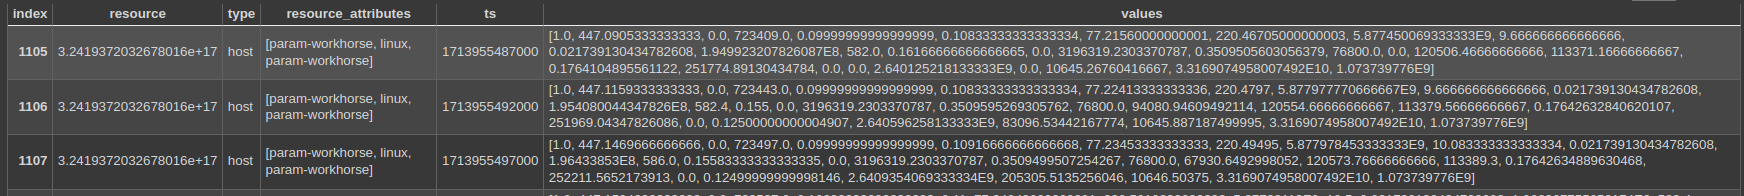

So it was decided to pick one resource with plenty of data to create an anomaly detection model. Here, i have choosen the resource with ID: 5.948095306408936e+17

In [14]:
data = resources.get_group(5.948095306408936e+17)

In [ ]:
data.to_csv(f'data_{5.948095306408936e+17}')

In [ ]:
data.to_csv(f'data_{2.0400866353547507e+18}.csv')

In [15]:
data = data.rename(columns={'values': 'metrics'})

In [16]:
data.head(1000)

,resource,type,resource_attributes,ts,metrics
327719,5.948095e+17,process,"[, , root, 191, kworker/11:1H-kblockd, linux, ...",1714641591000,"[0.0014303230013215814, 0.03666666666666667, 0..."
327720,5.948095e+17,process,"[root, param-workhorse, 191, kworker/11:1H-kbl...",1714641596000,"[0.0, 0.0014293930587167033, 0.036666666666666..."
327721,5.948095e+17,process,"[param-workhorse, 191, 2, , root, kworker/11:1...",1714641601000,"[0.0, 0.0014284673153728447, 0.036666666666666..."
327722,5.948095e+17,process,"[param-workhorse, 2, , root, linux, param-work...",1714641606000,"[0.0, 0.0014275407970206415, 0.036666666666666..."
327723,5.948095e+17,process,"[param-workhorse, 191, linux, root, param-work...",1714641611000,"[0.0, 0.0014266101974188513, 0.036666666666666..."
...,...,...,...,...,...
328714,5.948095e+17,process,"[param-workhorse, 191, param-workhorse, linux,...",1714646566000,"[0.0, 0.0, 0.0, 0.0021317634216315505, 0.09000..."
328715,5.948095e+17,process,"[191, root, param-workhorse, linux, param-work...",1714646571000,"[0.0, 0.0, 0.0, 0.00213092115258014, 0.0900000..."
328716,5.948095e+17,process,"[, , linux, 191, root, param-workhorse, param-...",1714646576000,"[0.0, 0.0, 0.0, 0.002130081456292179, 0.090000..."
328717,5.948095e+17,process,"[, , root, linux, 2, kworker/11:1H-events_high...",1714646581000,"[0.0, 0.0, 0.0, 0.002129234807666858, 0.090000..."


The list present in string format is ocnverted into as list type in the metrics column

In [17]:
data['metrics'] = data['metrics'].apply(eval)

Each value in the metrics column is added to the respective columns: 'memory_usage','memory_virtual', 'cpu_percent', 'cpu_time', 'disk_io','memory_percent'

In [18]:
import numpy as np
data[['memory_usage','memory_virtual', 'cpu_percent', 'cpu_time', 'disk_io','memory_percent']] = data['metrics'].apply(lambda x: pd.Series(x, dtype=np.float128) if len(x) == 6 else pd.Series([np.nan]*6))


In [19]:
data.head(5000)

,resource,type,resource_attributes,ts,metrics,memory_usage,memory_virtual,cpu_percent,cpu_time,disk_io,memory_percent
327719,5.948095e+17,process,"[, , root, 191, kworker/11:1H-kblockd, linux, ...",1714641591000,"[0.0014303230013215814, 0.03666666666666667, 0...",0.001430,0.036667,0.000000,0.0,0.0,0.0
327720,5.948095e+17,process,"[root, param-workhorse, 191, kworker/11:1H-kbl...",1714641596000,"[0.0, 0.0014293930587167033, 0.036666666666666...",0.000000,0.001429,0.036667,0.0,0.0,0.0
327721,5.948095e+17,process,"[param-workhorse, 191, 2, , root, kworker/11:1...",1714641601000,"[0.0, 0.0014284673153728447, 0.036666666666666...",0.000000,0.001428,0.036667,0.0,0.0,0.0
327722,5.948095e+17,process,"[param-workhorse, 2, , root, linux, param-work...",1714641606000,"[0.0, 0.0014275407970206415, 0.036666666666666...",0.000000,0.001428,0.036667,0.0,0.0,0.0
327723,5.948095e+17,process,"[param-workhorse, 191, linux, root, param-work...",1714641611000,"[0.0, 0.0014266101974188513, 0.036666666666666...",0.000000,0.001427,0.036667,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
392630,5.948095e+17,process,"[kworker/8:1H-kblockd, , , param-workhorse, pa...",1714464147000,"[0.0029315730625982584, 0.12333333333333334, 0...",0.002932,0.123333,0.000000,0.0,0.0,0.0
392631,5.948095e+17,process,"[linux, , 2, , root, param-workhorse, param-wo...",1714464152000,"[0.0029304126057665097, 0.12333333333333334, 0...",0.002930,0.123333,0.000000,0.0,0.0,0.0
392632,5.948095e+17,process,"[root, param-workhorse, , , param-workhorse, 1...",1714464157000,"[0.002929254752128602, 0.12333333333333334, 0....",0.002929,0.123333,0.000000,0.0,0.0,0.0
392633,5.948095e+17,process,"[param-workhorse, 2, , , param-workhorse, 191,...",1714464162000,"[0.0029280907296487637, 0.12333333333333334, 0...",0.002928,0.123333,0.000000,0.0,0.0,0.0


In [20]:
final_data = data.drop(columns=['resource', 'type','resource_attributes','metrics'])

In [21]:
final_data.info()
final_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 9162 entries, 327719 to 3074908
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ts              9162 non-null   int64   
 1   memory_usage    9162 non-null   float128
 2   memory_virtual  9162 non-null   float128
 3   cpu_percent     9162 non-null   float128
 4   cpu_time        9162 non-null   float128
 5   disk_io         9162 non-null   float128
 6   memory_percent  9162 non-null   float128
dtypes: float128(6), int64(1)
memory usage: 1002.1 KB


,ts,memory_usage,memory_virtual,cpu_percent,cpu_time,disk_io,memory_percent
count,9.162000e+03,9162.000000,9162.000000,9162.000000,9162.000000,9162.000000,9162.000000
mean,1.714551e+12,0.041523,0.082259,0.024549,0.011582,0.020489,0.047080
std,7.418383e+07,0.127721,0.170949,0.103540,0.053148,0.092955,0.151764
min,1.714452e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.714464e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.714548e+12,0.001320,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.714638e+12,0.003540,0.076667,0.000000,0.000000,0.001633,0.001709
max,1.714648e+12,0.576667,0.590000,0.590000,0.446667,0.583333,0.600000


The final_data is sorted w.r.t the time stamps and the time stamps are converted to datatime format from unix epoch format

In [22]:
final_data = final_data.sort_values(by='ts')
final_data['ts'] = final_data['ts'].apply(lambda x: datetime.datetime.fromtimestamp(x / 1000))

In [23]:
final_data

,ts,memory_usage,memory_virtual,cpu_percent,cpu_time,disk_io,memory_percent
390211,2024-04-30 04:40:52,0.0,0.000000,0.000000,0.000000,0.000000,0.0
390212,2024-04-30 04:40:57,0.0,0.000000,0.000000,0.000000,0.000000,0.0
390213,2024-04-30 04:41:02,0.0,0.000000,0.000000,0.001865,0.003333,0.0
390214,2024-04-30 04:41:07,0.0,0.000000,0.000000,0.001848,0.003333,0.0
390215,2024-04-30 04:41:12,0.0,0.000000,0.000000,0.001831,0.003333,0.0
...,...,...,...,...,...,...,...
3074904,2024-05-02 11:14:21,0.0,0.002816,0.136667,0.000000,0.000000,0.0
3074905,2024-05-02 11:14:26,0.0,0.002815,0.136667,0.000000,0.000000,0.0
3074906,2024-05-02 11:14:31,0.0,0.002814,0.136667,0.000000,0.000000,0.0
3074907,2024-05-02 11:14:36,0.0,0.002813,0.136667,0.000000,0.000000,0.0


# **Exploratory Data Analysis**

In [24]:
import matplotlib.pyplot as plt

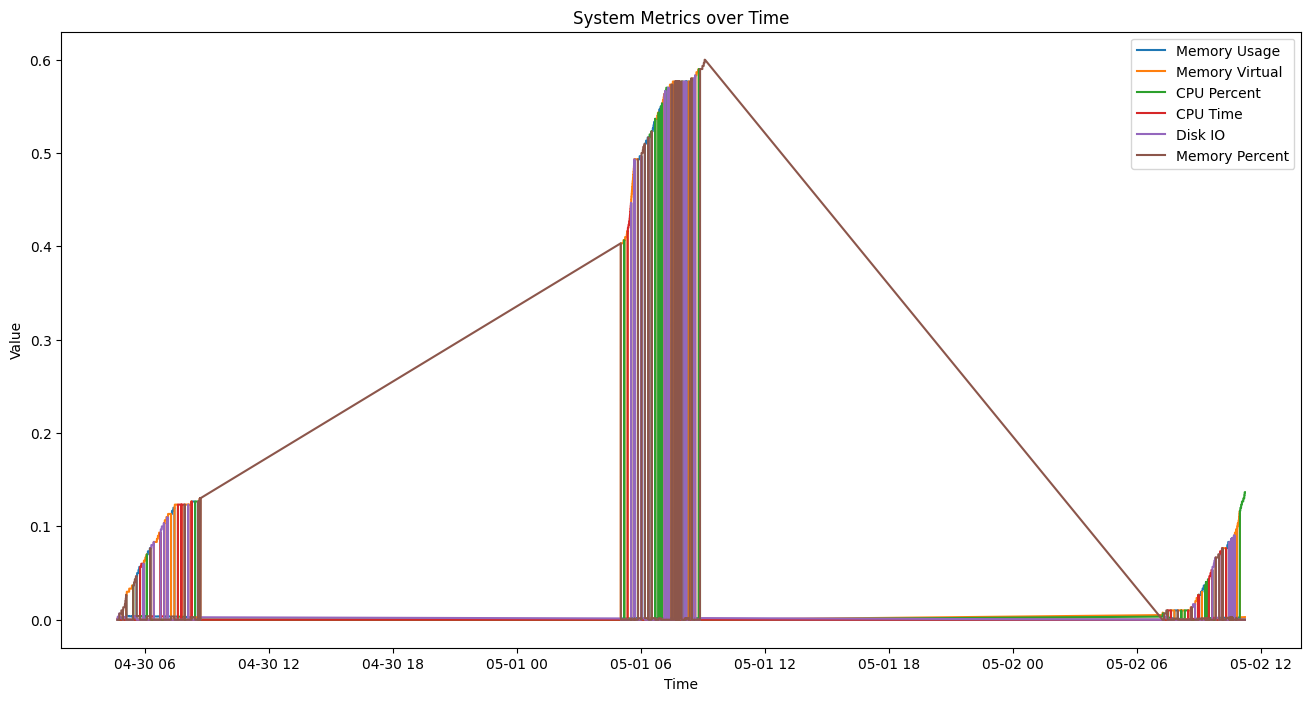

In [25]:
# Plotting all the metrics to get an idea of the data, from a bird's eye view we can see that the data does follow a trend
plt.figure(figsize=(16, 8))

plt.plot(final_data['ts'], final_data['memory_usage'], label='Memory Usage')
plt.plot(final_data['ts'], final_data['memory_virtual'], label='Memory Virtual')
plt.plot(final_data['ts'], final_data['cpu_percent'], label='CPU Percent')
plt.plot(final_data['ts'], final_data['cpu_time'], label='CPU Time')
plt.plot(final_data['ts'], final_data['disk_io'], label='Disk IO')
plt.plot(final_data['ts'], final_data['memory_percent'], label='Memory Percent')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('System Metrics over Time')
plt.legend()
plt.show()

In [26]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [27]:
numeric_df = final_data.copy()

In [28]:
# Setting `ts` column as the index
final_data['ts'] = pd.to_datetime(final_data['ts'])
final_data.set_index('ts', inplace=True)

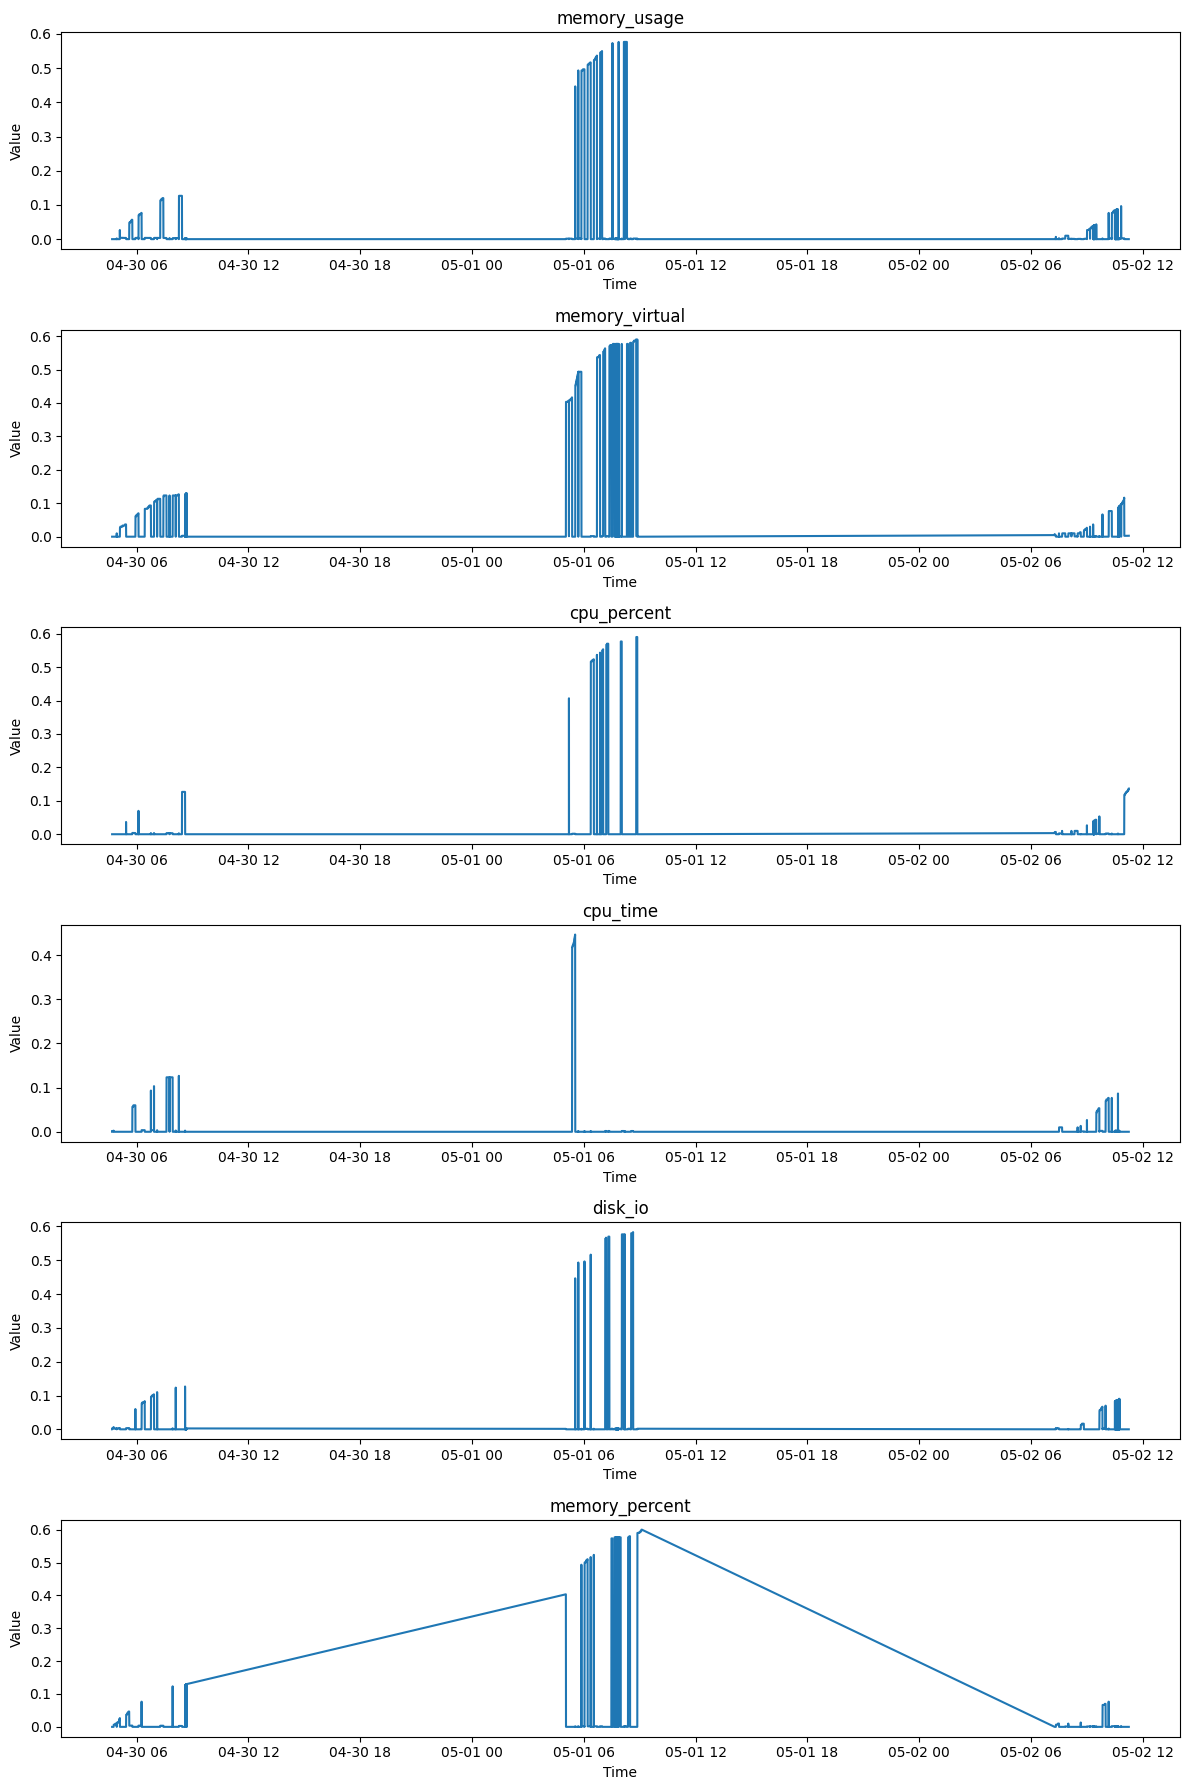

In [29]:
# Plotting individual metric values
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(12, 18))
for i, col in enumerate(['memory_usage','memory_virtual', 'cpu_percent', 'cpu_time', 'disk_io','memory_percent']):
    axs[i].plot(final_data.index, final_data[col])
    axs[i].set_title(col)
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Value')
plt.tight_layout()
plt.show()

### Correlation metrics

According to the matrix, there is a weak negative correlation between memory usage and cpu time, memory usage and cpu percent, memory usage and memory virtual, memory usage and disk io, and memory usage and memory percent.

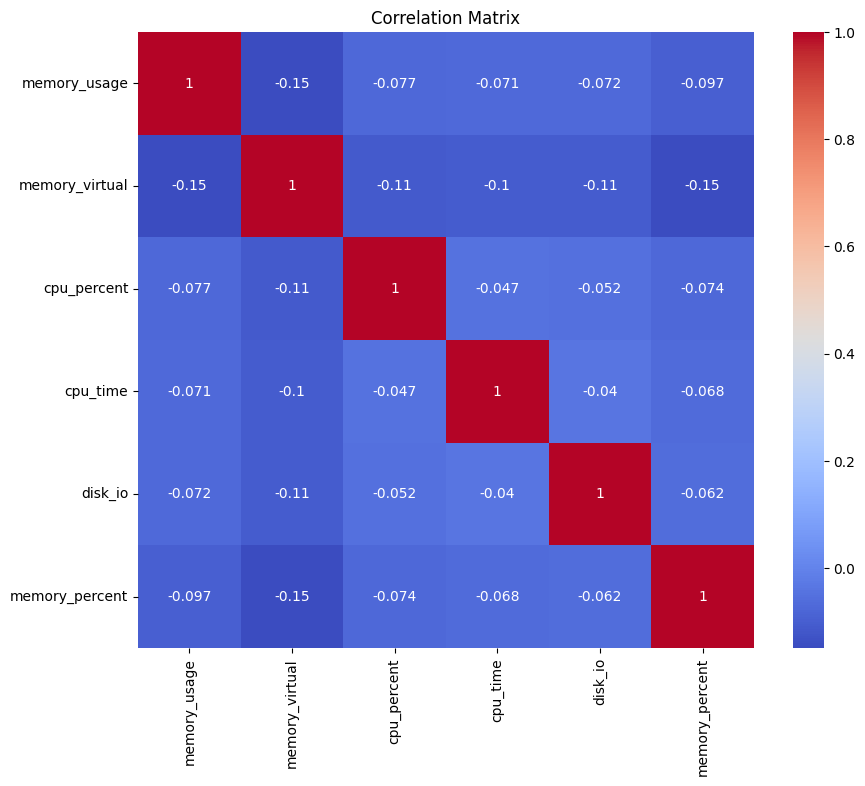

In [30]:
corr_matrix = final_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Autocorelation and Partial Autocorelation Graphs suggest that there is a periodic activity happening in the resource, which may mean that the resource could be running a scheduled task or cronjob

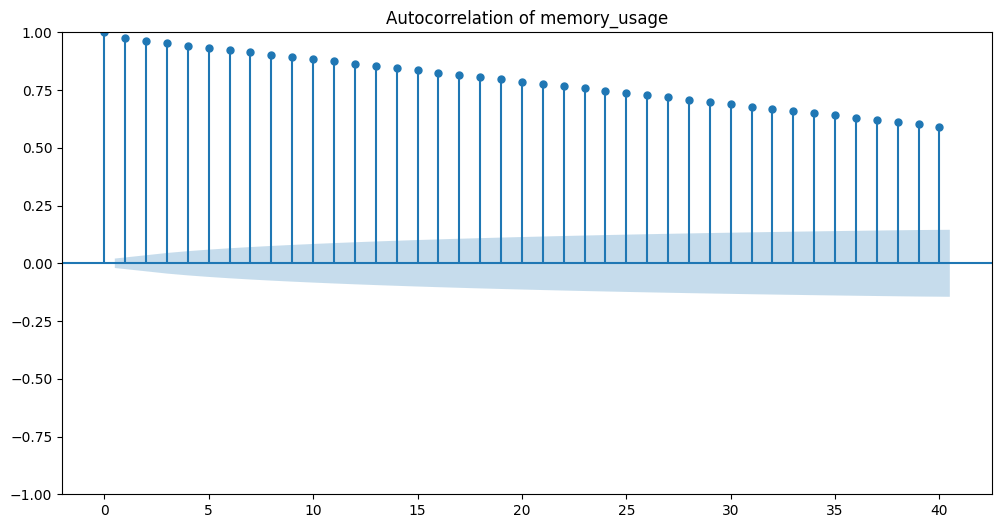

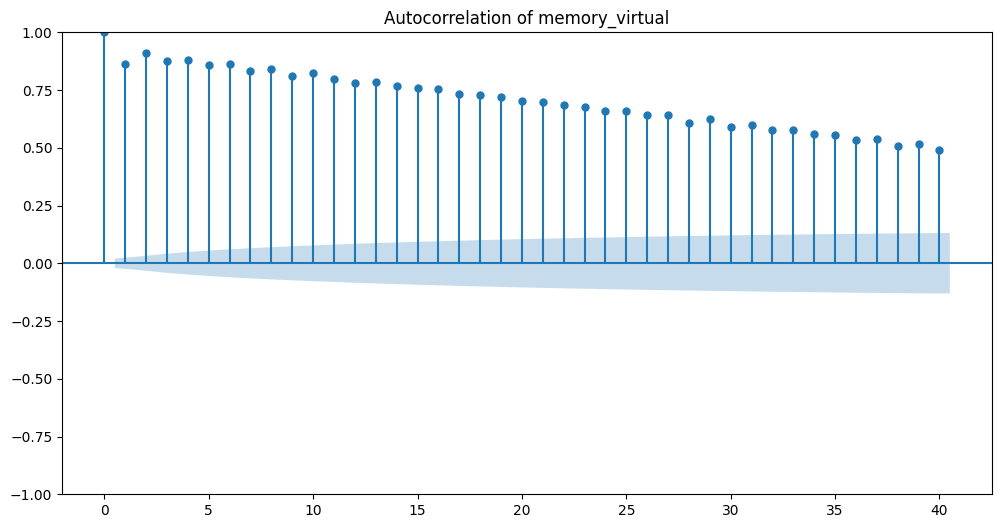

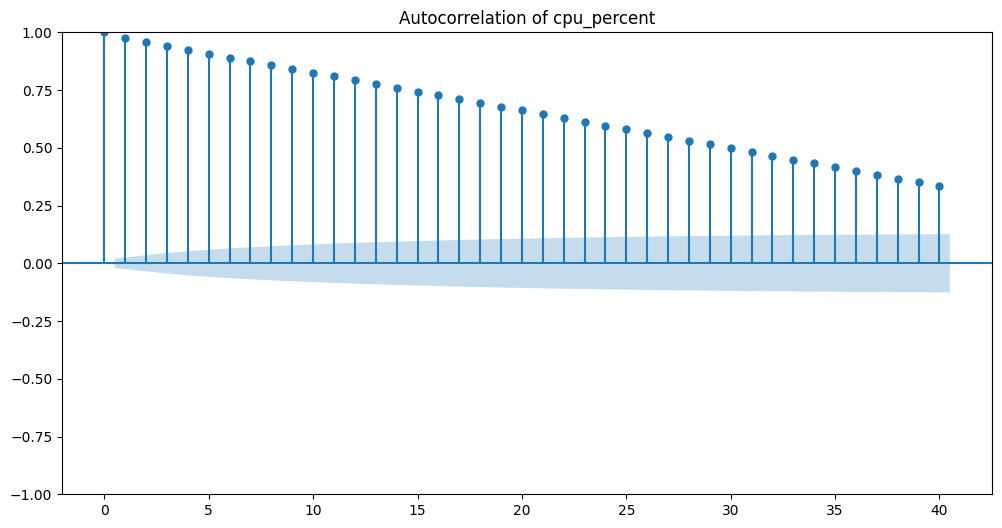

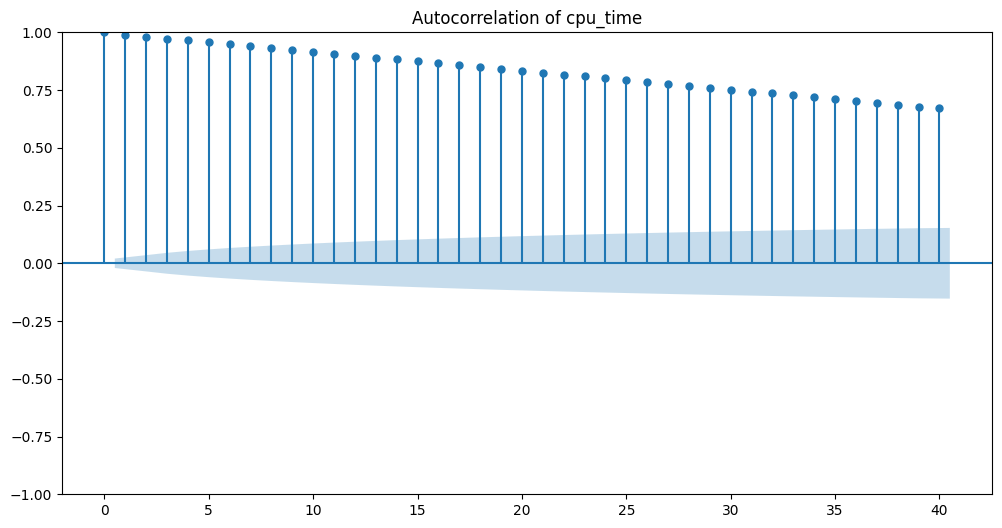

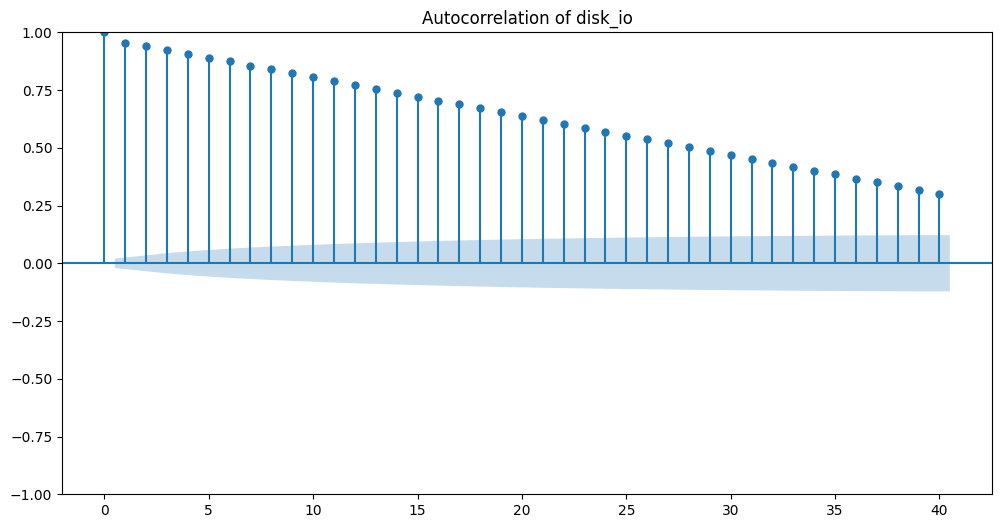

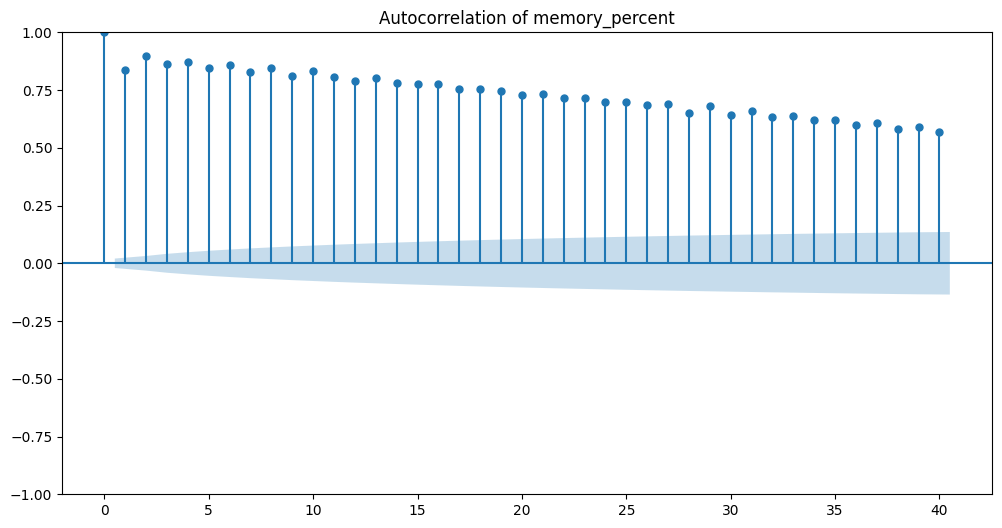

In [31]:
for col in ['memory_usage','memory_virtual', 'cpu_percent', 'cpu_time', 'disk_io','memory_percent']:
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_acf(final_data[col], ax=ax)
    plt.title(f'Autocorrelation of {col}')
    plt.show()

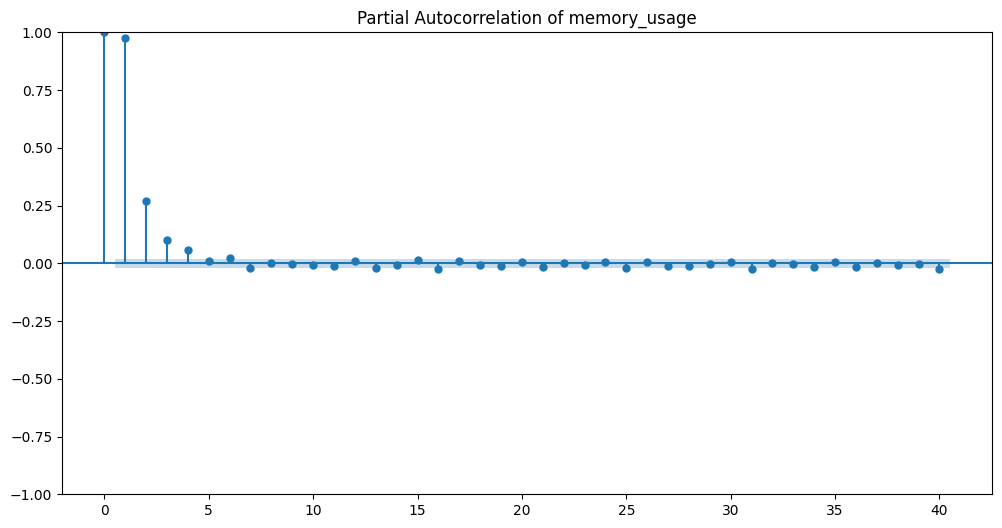

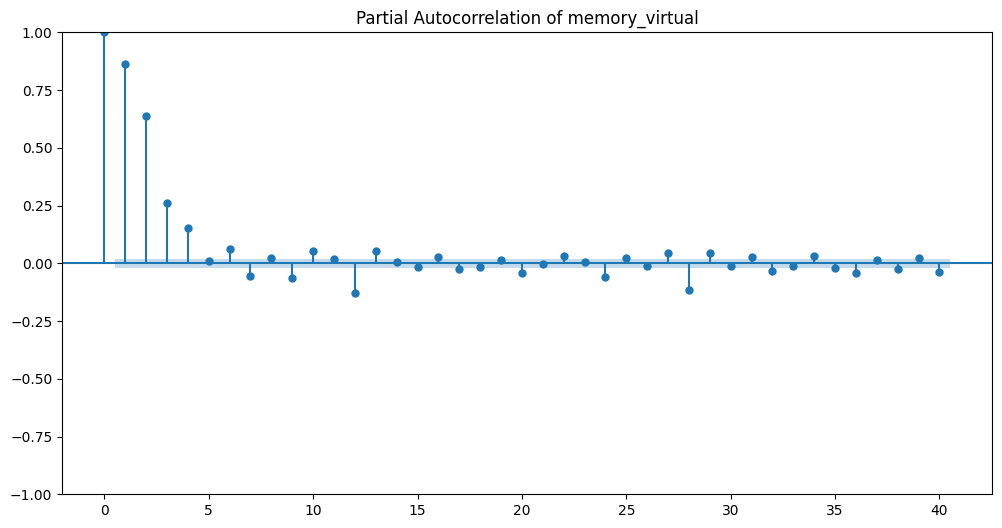

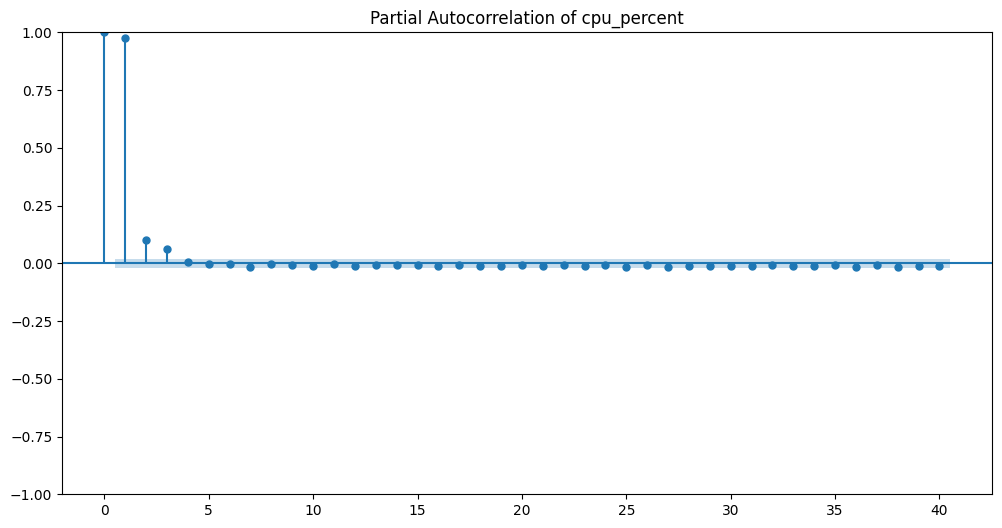

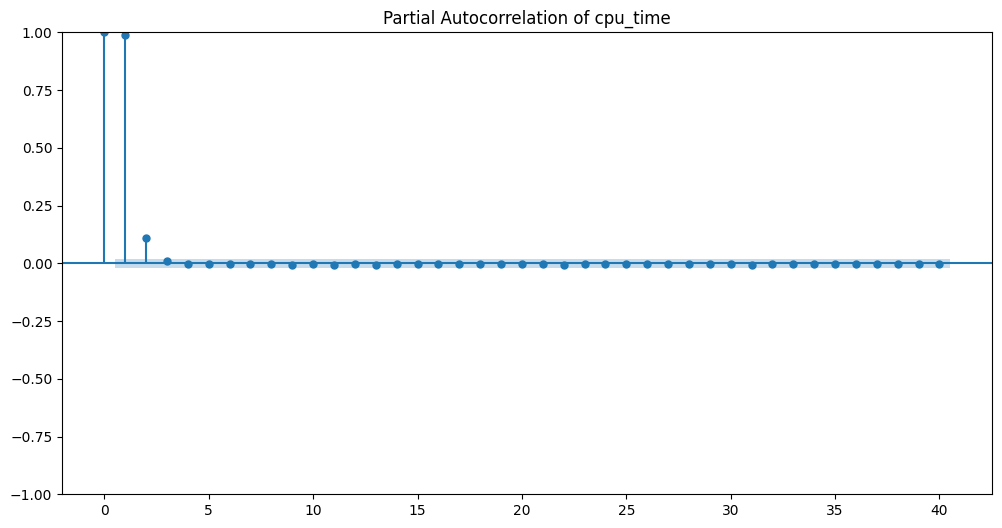

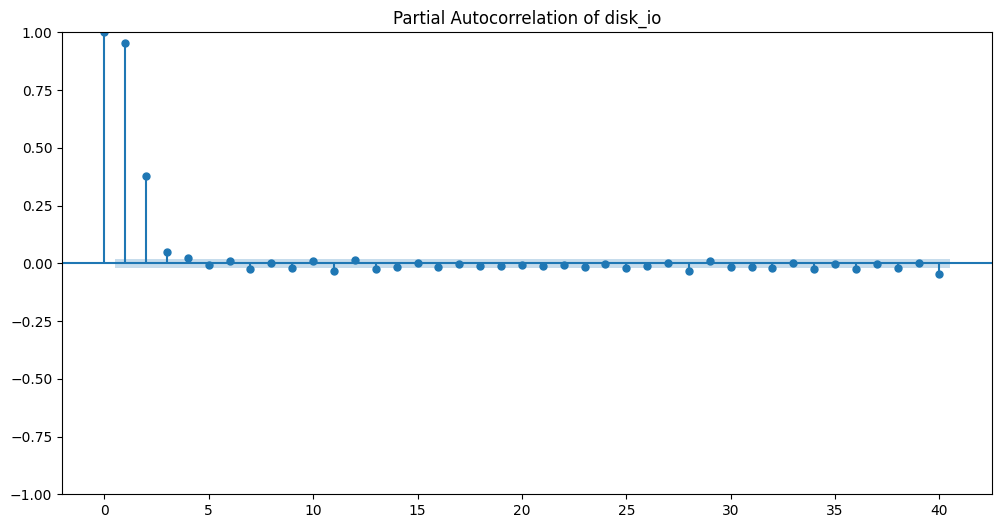

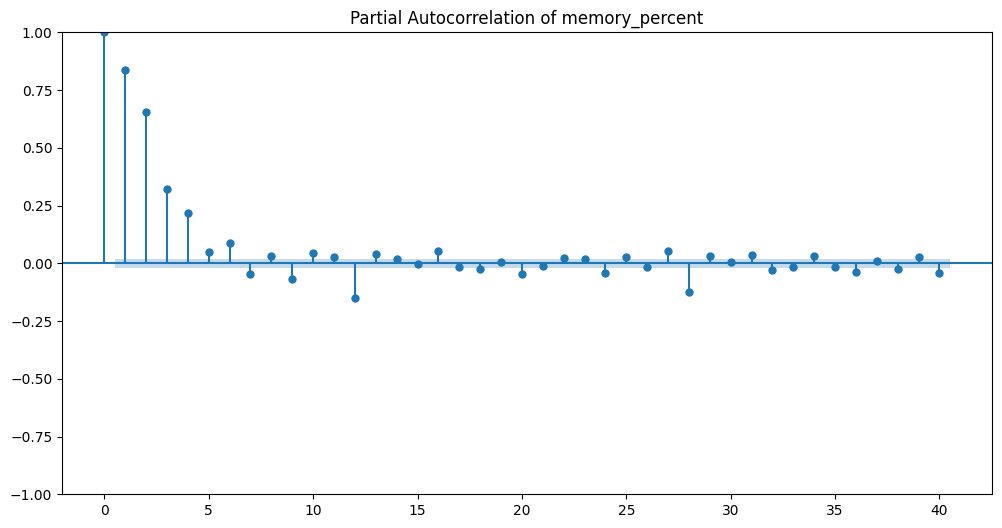

In [32]:
for col in ['memory_usage','memory_virtual', 'cpu_percent', 'cpu_time', 'disk_io','memory_percent']:
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_pacf(final_data[col], ax=ax)
    plt.title(f'Partial Autocorrelation of {col}')
    plt.show()

### Model Development

Since the data we have is unlabelled and multivariate, we will be using OneClassSVM and IsolationForests to detect anomalies in our metrics data.

In [33]:
# Scaling the data to have 0 mean and variance = 1
scaler = StandardScaler()
df_scaled = scaler.fit_transform(final_data)

In [34]:
# Extracting the principal components from scaled data
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

In [35]:
df_pca

array([[-0.08562295, -0.01118362,  0.03614377, -0.002502  , -0.00103307,
        -0.75963812],
       [-0.08562295, -0.01118362,  0.03614377, -0.002502  , -0.00103307,
        -0.75963812],
       [-0.09723534, -0.01858553,  0.06268992, -0.03527967,  0.00170387,
        -0.7363815 ],
       ...,
       [-0.2739544 , -0.10548575,  0.72986319,  0.96485038, -0.23661778,
        -0.28442896],
       [-0.27395915, -0.10548574,  0.7298638 ,  0.96485041, -0.23661781,
        -0.28443198],
       [-0.27396388, -0.10548573,  0.7298644 ,  0.96485043, -0.23661784,
        -0.284435  ]])

In [36]:
# Training with OneClassSVM model using a polynomial kernel for our multivariate data
ocsvm = OneClassSVM(kernel='poly', gamma=0.1, nu=0.1)
ocsvm.fit(df_pca)

OneClassSVM(gamma=0.1, kernel='poly', nu=0.1)

In [37]:
# Training with IsolationForest, we assume the contamination is 0.1 but we will make our final decision about the anomaly based on the weighted average of both models
iforest = IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.1), random_state=42)
iforest.fit(df_pca)

IsolationForest(contamination=0.1, random_state=42)

In [38]:
anomaly_scores_ocsvm = ocsvm.decision_function(df_pca)
anomaly_scores_iforest = iforest.decision_function(df_pca)

anomaly_labels_ocsvm = np.where(anomaly_scores_ocsvm > 0, 1, -1)
anomaly_labels_iforest = np.where(anomaly_scores_iforest > 0, 1, -1)

In [39]:
# Combining the anomaly scores using a weighted average
anomaly_scores_combined = 0.5 * anomaly_scores_iforest + 0.5 * anomaly_scores_ocsvm

# We are assuming the top 5% of outlires are anomaly in our data
threshold = np.percentile(anomaly_scores_combined, 95)
anomaly_labels = (anomaly_scores_combined > threshold).astype(int)

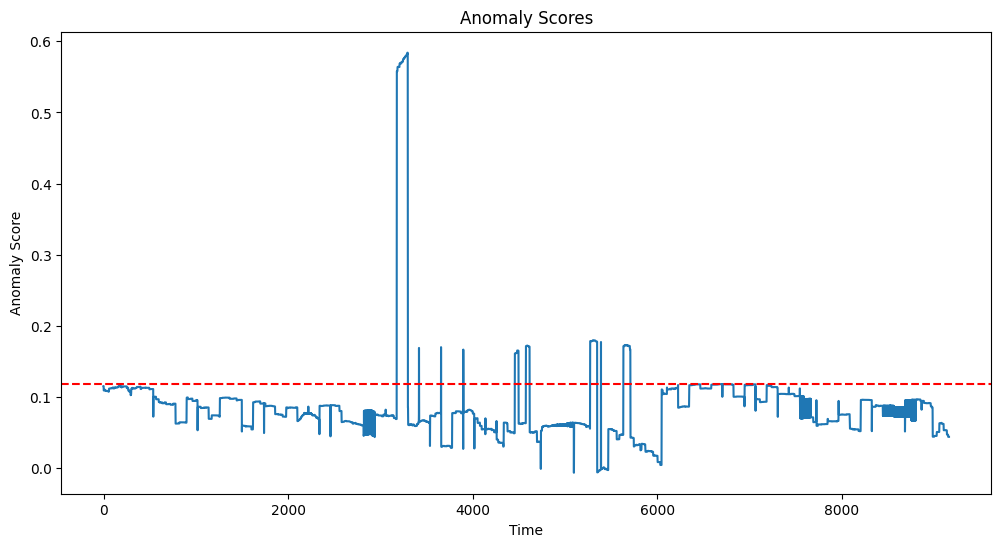

In [40]:
# Plot the anomaly scores
plt.figure(figsize=(12, 6))
plt.plot(anomaly_scores_combined)
plt.axhline(threshold, color='r', linestyle='--')
plt.title('Anomaly Scores')
plt.xlabel('Time')
plt.ylabel('Anomaly Score')
plt.show()

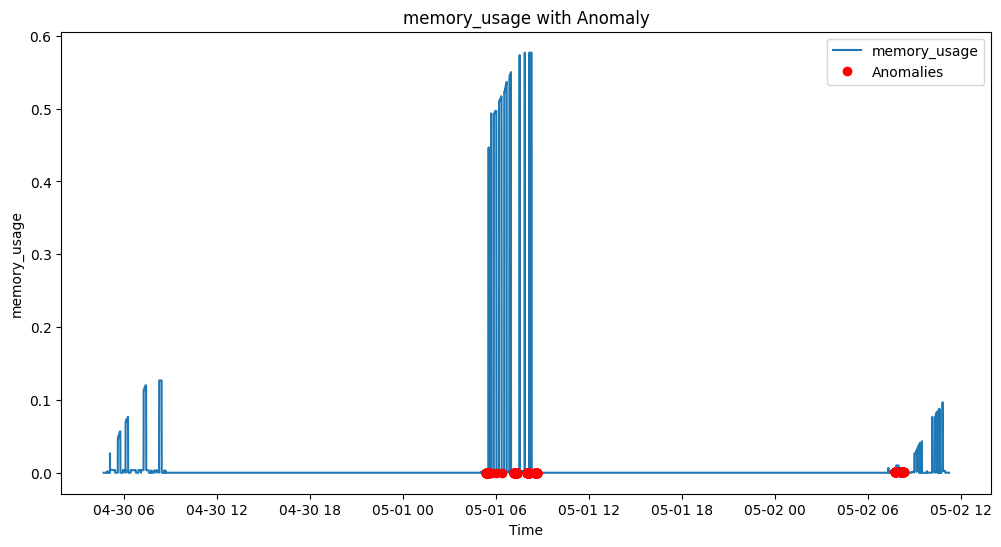

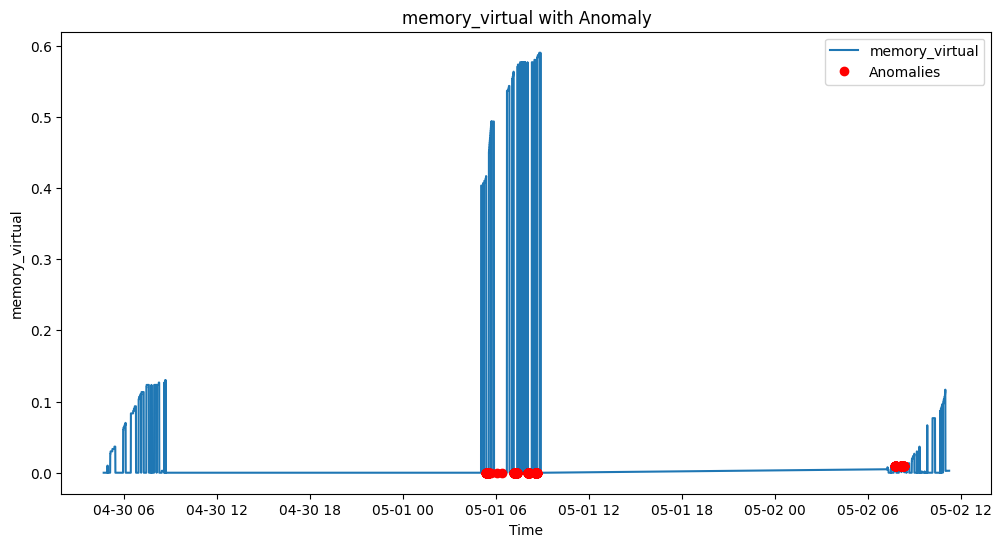

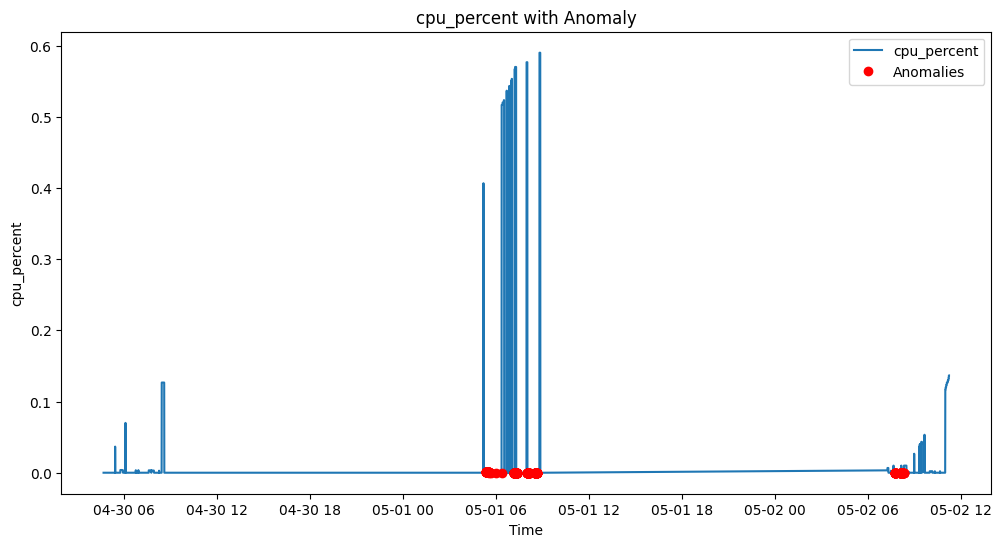

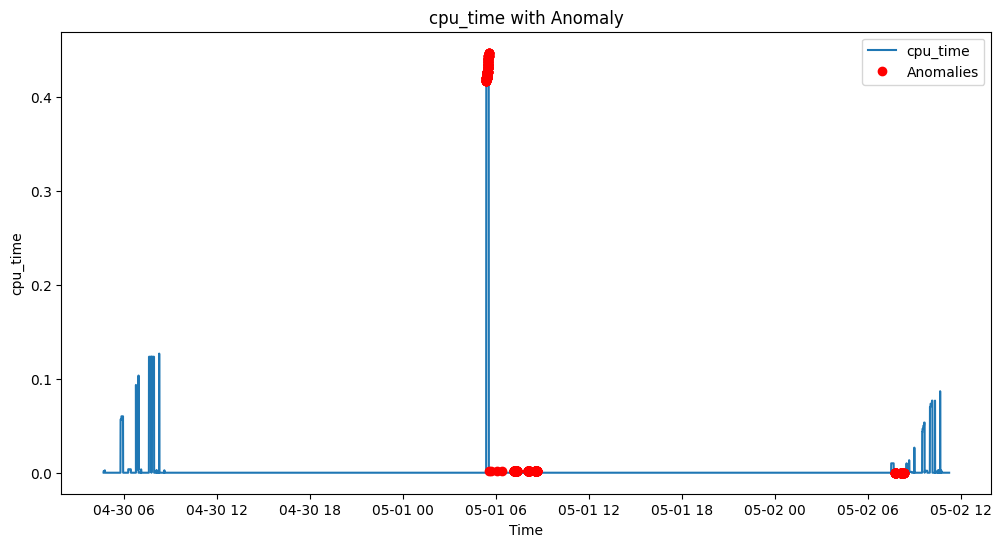

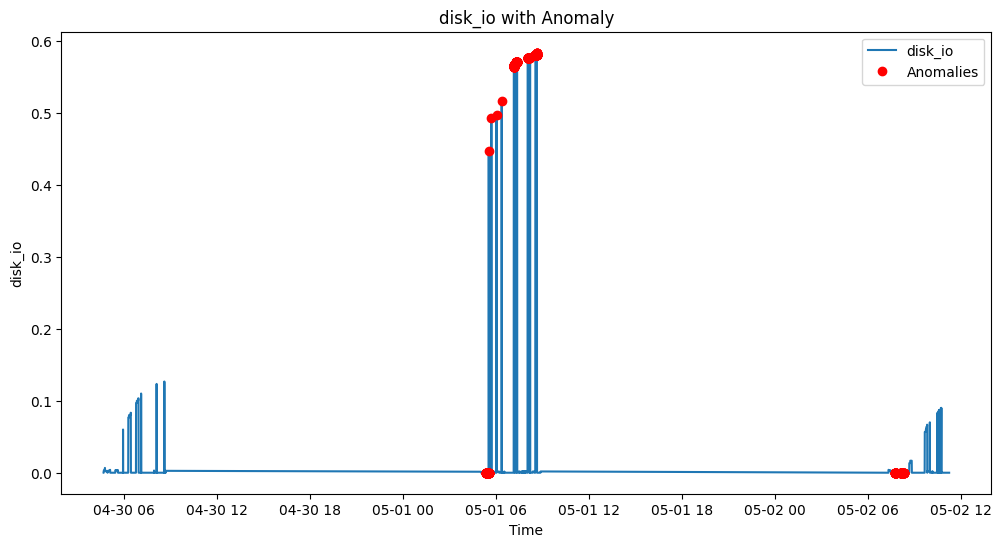

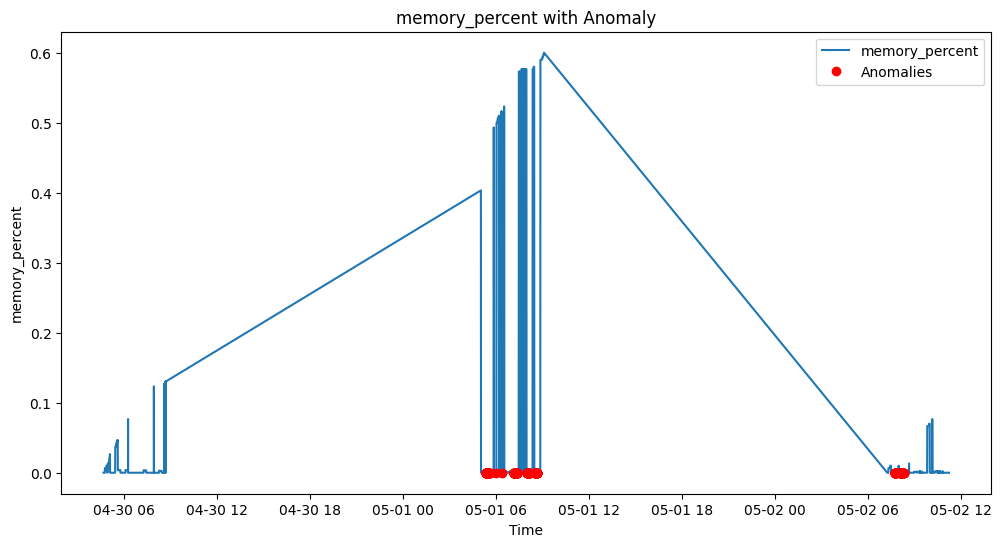

In [45]:
# Plotting the original data with anomalies highlighted
metrics = ['memory_usage', 'memory_virtual', 'cpu_percent', 'cpu_time', 'disk_io', 'memory_percent']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.plot(final_data[metric], label=metric)
    plt.plot(final_data.index[anomaly_labels == 1], final_data[metric][anomaly_labels == 1], 'ro', label='Anomalies')
    plt.title(f'{metric} with Anomaly')
    plt.xlabel('Time')
    plt.ylabel(metric)
    plt.legend()
    plt.show()